In [1]:

import cv2
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt
plt.axis([0, 30, 0, 2])

%matplotlib inline
import time

C:\Users\Gautam\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model=load_model('model_1.h5')

In [6]:
emotions=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

In [13]:
cap= cv2.VideoCapture(0)
fourcc = cv2.VideoWriter_fourcc('m','p','4','v')
out = cv2.VideoWriter('Emotions.mp4v', fourcc, 20.0, (640, 480))
emotion_index=[]
base=time.time()
x_vec=[]
while(True):
    x=time.time()-base
    x_vec.append(x)
    ret, frame=cap.read()
    frame=cv2.flip(frame,1)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    copy=gray[100:300,200:400].copy()
    copy=cv2.resize(copy, (48,48))
    copy=copy/255.0
    emotion=emotions[model.predict(copy.reshape(-1,48,48,1)).argmax()] ##add .argmax()
    emotion_index.append(emotion)
    graywrectangle=cv2.rectangle(gray,(200,100),(400,300),(0,255,0),1)
    font                   = cv2.FONT_HERSHEY_SIMPLEX
    bottomLeftCornerOfText = (100,400)
    fontScale              = 0.5
    fontColor              = (255,255,255)
    lineType               = 2   
    
    cv2.putText(graywrectangle,emotion, 
    bottomLeftCornerOfText, 
    font, 
    fontScale,
    fontColor,
    lineType)
    
    cv2.putText(graywrectangle,"Gautam Ahuja, 2019: Press q to exit", 
    (10,10), 
    font, 
    fontScale,
    fontColor,
    1)
    
    cv2.putText(graywrectangle,"Illuminate your face with a evenly to see results", 
    (10,30), 
    font, 
    fontScale,
    fontColor,
    1)
    
   
    # Display the resulting frame
    cv2.imshow('frame',graywrectangle)
    out.write(graywrectangle)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
out.release()
cv2.destroyAllWindows()

Text(0,0.5,'Emotions')

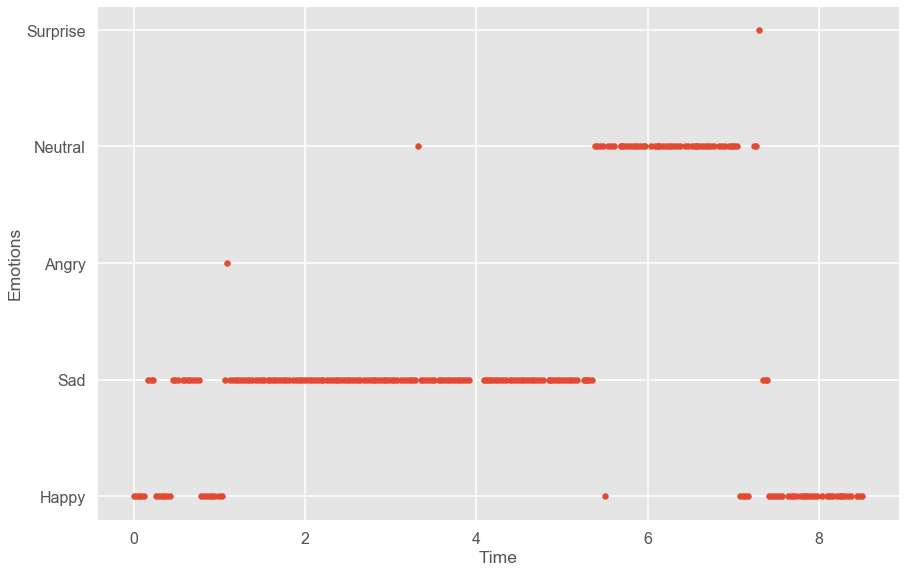

In [31]:
# use ggplot style for more sophisticated visuals
plt.style.use('seaborn-poster')
plt.scatter(x_vec, emotion_index, s=35)
plt.xlabel("Time")
plt.ylabel("Emotions")

In [16]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']